In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [30]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
# Another way to do it with pd.dummies...
dummies = pd.get_dummies(tips[["sex", "day", "smoker", 'time']])
dummies

,sex_Male,sex_Female,day_Thur,day_Fri,day_Sat,day_Sun,smoker_Yes,smoker_No,time_Lunch,time_Dinner
0,0,1,0,0,0,1,0,1,0,1
1,1,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,1,0,1,0,1
3,1,0,0,0,0,1,0,1,0,1
4,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
239,1,0,0,0,1,0,0,1,0,1
240,0,1,0,0,1,0,1,0,0,1
241,1,0,0,0,1,0,1,0,0,1
242,1,0,0,0,1,0,0,1,0,1


In [23]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["sex", "day", "smoker", 'time']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

t_tips = transformer.fit_transform(tips)

In [26]:
df_tips = pd.DataFrame(t_tips)

In [27]:
df_tips.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,16.99,1.01,2.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,10.34,1.66,3.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,21.01,3.50,3.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,23.68,3.31,2.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,24.59,3.61,4.0


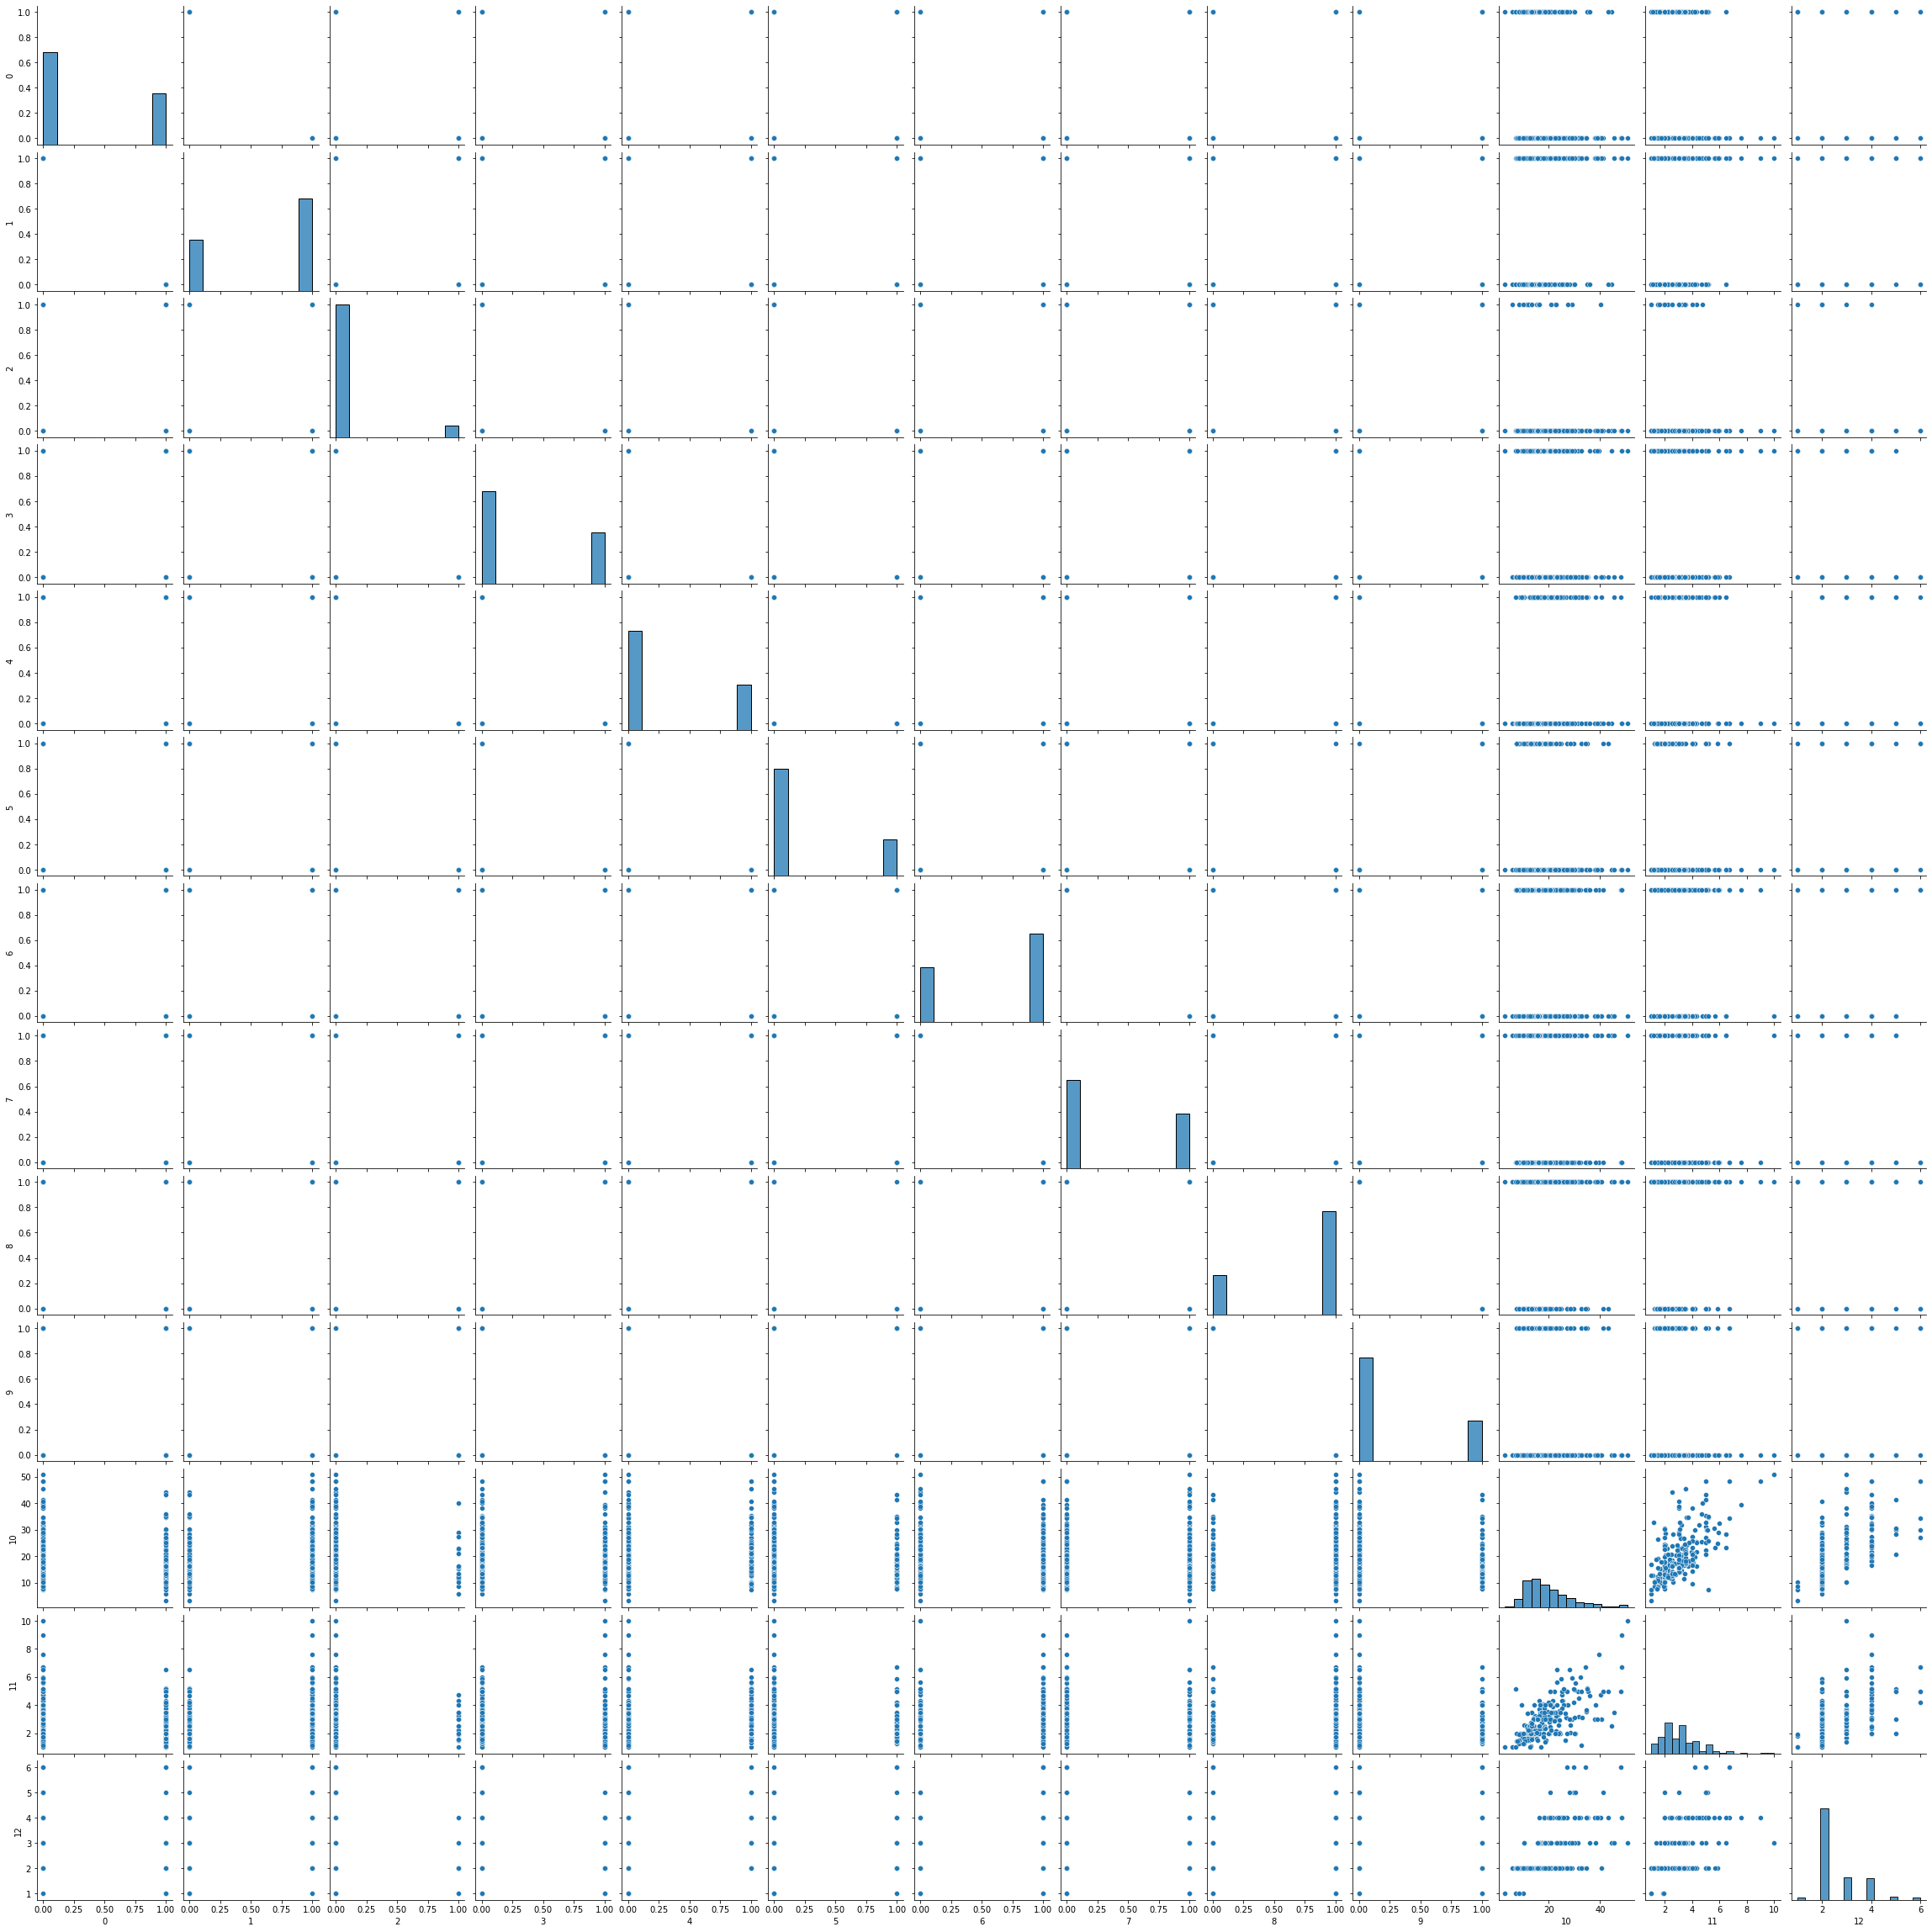

In [28]:
sns.pairplot(df_tips)

In [ ]:
tips['sex']

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
239      Male
240    Female
241      Male
242      Male
243    Female
Name: sex, Length: 244, dtype: category
Categories (2, object): ['Male', 'Female']

In [ ]:
tips['sex'].replace('Male', 1)
tips['male'] = tips['sex']
tips['female'] = tips['sex']

In [ ]:
tips['male'].replace('Female',0)
tips['female'].replace(1,0)
tips['female'].replace('Female',1)

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size,male,female
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,Female
1,10.34,1.66,Male,No,Sun,Dinner,3,Male,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male,Male
3,23.68,3.31,Male,No,Sun,Dinner,2,Male,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female,Female
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,Male,Male
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Female,Female
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Male,Male
242,17.82,1.75,Male,No,Sat,Dinner,2,Male,Male
